# Refinement

We try a few more models with more wrangling of the data and see if we can improve the result of our first model

Please refer to the data exploration notebook for visuals [here](https://github.com/Caparisun/Linear_Regression_Project/blob/master/Notebooks_and_data/1.basic_data_exploration.ipynb)

The first wrangling iteration can be found [here](https://github.com/Caparisun/Linear_Regression_Project/blob/master/Notebooks_and_data/2.Datawrangling.ipynb).

To view the applications of the first algorithms please click [here](https://github.com/Caparisun/Linear_Regression_Project/blob/master/Notebooks_and_data/3.Applying_Model.ipynb)

To view the normalization please click [here](https://github.com/Caparisun/Linear_Regression_Project/blob/master/Notebooks_and_data/4.Iteration_normalized.ipynb)

To view the application of the normalized data please click [here](https://github.com/Caparisun/Linear_Regression_Project/blob/master/Notebooks_and_data/5.applying_model_norm.ipynb)

In [341]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
import statsmodels.formula.api as sm
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore") # ignore warning from libraries 
import math 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [342]:
# define column header names in a list
names=["id", "date", "bedrooms", "bathrooms","sqft_living", "sqft_lot", "floors", "waterfront", "view", "condition", "grade", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "zipcode", "lat", "long", "sqft_living15", "sqft_lot15", "price"]

In [343]:
# Import data into pandas dataframe. We are using the original data again
df = pd.read_csv('regression_data.csv',names=names )

In [344]:
# check if the import worked 
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [345]:
# remove the duplicate id's again and only keep the most recent one

# first we need to convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])

# sort the dataframe by id and date
df = df.sort_values(by=['id', 'date'])

#drop all duplicate ID's, keep the last one
df_drop = df.drop_duplicates(['id'], keep='last')

#check if that worked and we have less rows
df_drop.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 2495 to 15937
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21420 non-null  int64         
 1   date           21420 non-null  datetime64[ns]
 2   bedrooms       21420 non-null  int64         
 3   bathrooms      21420 non-null  float64       
 4   sqft_living    21420 non-null  int64         
 5   sqft_lot       21420 non-null  int64         
 6   floors         21420 non-null  float64       
 7   waterfront     21420 non-null  int64         
 8   view           21420 non-null  int64         
 9   condition      21420 non-null  int64         
 10  grade          21420 non-null  int64         
 11  sqft_above     21420 non-null  int64         
 12  sqft_basement  21420 non-null  int64         
 13  yr_built       21420 non-null  int64         
 14  yr_renovated   21420 non-null  int64         
 15  zipcode        2

In [346]:
# we will directly drop the columns "ID", "lat", "long" 
# since they provide no value to our analysis

df_drop=df_drop.drop(['id', 'lat','long'], axis = 1) 

In [347]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 2495 to 15937
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21420 non-null  datetime64[ns]
 1   bedrooms       21420 non-null  int64         
 2   bathrooms      21420 non-null  float64       
 3   sqft_living    21420 non-null  int64         
 4   sqft_lot       21420 non-null  int64         
 5   floors         21420 non-null  float64       
 6   waterfront     21420 non-null  int64         
 7   view           21420 non-null  int64         
 8   condition      21420 non-null  int64         
 9   grade          21420 non-null  int64         
 10  sqft_above     21420 non-null  int64         
 11  sqft_basement  21420 non-null  int64         
 12  yr_built       21420 non-null  int64         
 13  yr_renovated   21420 non-null  int64         
 14  zipcode        21420 non-null  int64         
 15  sqft_living15  2

In [348]:
# creating a copy of the dataframe
df3=df_drop

In [349]:
# define a quick function to convert the year renovated into a boolean value
# this is because we know from our real estate experience, that a renovation has an impact on the price, 
# but the year of renovation usually doesn't matter, only the fact that it got renovated

def boolean(x):
    if x == 0:
        n = 0
    elif x > 0:
        n = 1
    return n

In [350]:
# apply booloean function to yr_renovated colum. This means, I'll only tell the model wether or not a renovation happened. 
# This also helps with the distribution of the data
df_drop['yr_renovated']=df_drop['yr_renovated'].apply(boolean)

# do the same for sqft_basement, only acting as indicator on wether or not there is a basement
# due to the amount of zeros in the column
df_drop['sqft_basement']=df_drop['sqft_basement'].apply(boolean)

# do the same for view, only acting as indicator on wether or not there is a view
df_drop['view']=df_drop['view'].apply(boolean)


# check if that worked by looking at the head again
df_drop.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
2495,2015-04-22,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,2060,7316,300000
6729,2014-05-08,4,1.75,2060,26036,1.0,0,0,4,8,1160,1,1947,0,98166,2590,21891,647500
8404,2014-08-11,3,1.00,1460,43000,1.0,0,0,3,7,1460,0,1952,0,98166,2250,20023,400000
8800,2015-04-01,3,1.00,1430,7599,1.5,0,0,4,6,1010,1,1930,0,98168,1290,10320,235000
3553,2015-03-19,4,2.00,1650,3504,1.0,0,0,3,7,760,1,1951,1,98144,1480,3504,402500


In [351]:
# now we look at the unique values for each row
for c in df_drop.columns.tolist():       #iterate over a list of the columns  
    print(c, len(df_drop[c].unique()))   #print the colum header and the unique values
# the duplicates are succesfully removed from the dataframe

date 372
bedrooms 12
bathrooms 29
sqft_living 1034
sqft_lot 9776
floors 6
waterfront 2
view 2
condition 5
grade 11
sqft_above 942
sqft_basement 2
yr_built 116
yr_renovated 2
zipcode 70
sqft_living15 777
sqft_lot15 8682
price 3595


In [352]:
# We will transform the date column to ordinal format 
# to make it applicable for the model and keeop the cyclical characteristics of the data
df_drop['date']=df_drop['date'].apply(lambda x: x.toordinal())


In [353]:
# check dataframe
df_drop.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
2495,735710,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,2060,7316,300000
6729,735361,4,1.75,2060,26036,1.0,0,0,4,8,1160,1,1947,0,98166,2590,21891,647500
8404,735456,3,1.00,1460,43000,1.0,0,0,3,7,1460,0,1952,0,98166,2250,20023,400000
8800,735689,3,1.00,1430,7599,1.5,0,0,4,6,1010,1,1930,0,98168,1290,10320,235000
3553,735676,4,2.00,1650,3504,1.0,0,0,3,7,760,1,1951,1,98144,1480,3504,402500


In [354]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 2495 to 15937
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21420 non-null  int64  
 1   bedrooms       21420 non-null  int64  
 2   bathrooms      21420 non-null  float64
 3   sqft_living    21420 non-null  int64  
 4   sqft_lot       21420 non-null  int64  
 5   floors         21420 non-null  float64
 6   waterfront     21420 non-null  int64  
 7   view           21420 non-null  int64  
 8   condition      21420 non-null  int64  
 9   grade          21420 non-null  int64  
 10  sqft_above     21420 non-null  int64  
 11  sqft_basement  21420 non-null  int64  
 12  yr_built       21420 non-null  int64  
 13  yr_renovated   21420 non-null  int64  
 14  zipcode        21420 non-null  int64  
 15  sqft_living15  21420 non-null  int64  
 16  sqft_lot15     21420 non-null  int64  
 17  price          21420 non-null  int64  
dtypes: 

In [355]:
df_drop.describe()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
count,21420.000000,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.00000,21420.000000,21420.000000,2.142000e+04
mean,735535.717414,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.007610,0.098693,3.410784,7.662792,1791.170215,0.393137,1971.092997,0.042484,98077.87437,1988.384080,12775.718161,5.418614e+05
std,113.186907,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.086903,0.298256,0.650035,1.171971,828.692965,0.488458,29.387141,0.201695,53.47748,685.537057,27345.621867,3.675569e+05
min,735355.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.00000,399.000000,651.000000,7.800000e+04
25%,735436.000000,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.00000,1490.000000,5100.000000,3.249500e+05
50%,735523.000000,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.00000,1840.000000,7620.000000,4.505500e+05
75%,735647.000000,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,1.000000,1997.000000,0.000000,98117.00000,2370.000000,10086.250000,6.450000e+05
max,735745.000000,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,1.000000,5.000000,13.000000,9410.000000,1.000000,2015.000000,1.000000,98199.00000,6210.000000,871200.000000,7.700000e+06


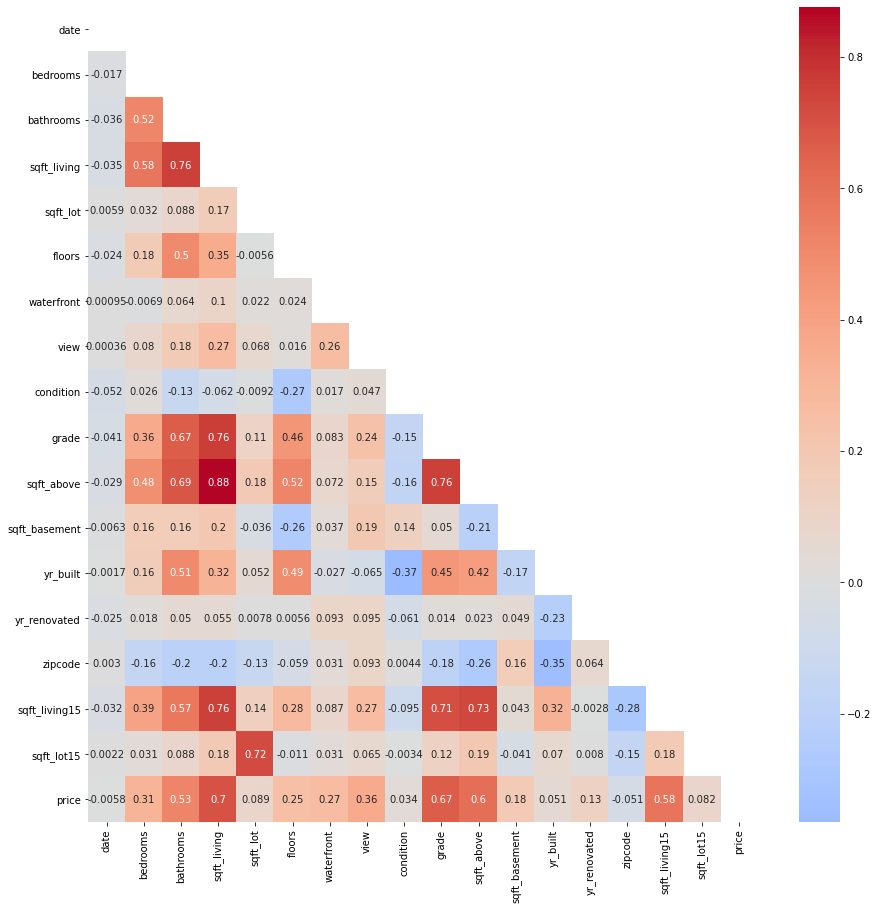

In [356]:
# check multicolinearity
fig, ax = plt.subplots(figsize=(15, 15))

mask=np.zeros_like(df_drop.corr()) # define fields we don't want to see
mask[np.triu_indices_from(mask)]=True

sns.heatmap(df_drop.corr(),  # the data for the heatmap, our dataframe
            mask=mask,  # "deactivates" all fields in our heatmap according to the mask
            annot=True,  # show the actual values of correlation in the map
            cmap='coolwarm',  # provide the 'coolwarm' colormap for the heatmap
            center=0,  # specify the value at which to center the colormap, we set it to zero, so negative correlations are displayed as negatives
           )
plt.show()

- From the heatmap we can see that sqft_living has overall higher correlation with other variables than sqft_living15. 
- Since sqft_living15 provides newer values and means the same, we will remove sqft_living. 
- The same applies in the case of sqft_lot, but here we are going to drop the newer values, since they provide overall higher correlation.
- It is okay that bathrooms and floors are highly correlated, since it's expected to have at least 0.5 bathrooms per floor, this is natural to the data.
- The Zipcode appears to provide no correlations, so we will drop it at this point
- The same applies to condition, grade seems to have greater impact on price

In [357]:
#creating a copy before further wrangling
df_copy = df_drop

In [358]:
# dropping columns as outlined above
df_drop=df_drop.drop(['sqft_living', 'sqft_lot15', 'zipcode', 'condition'], axis = 1) 

In [359]:
# control dataframe
df_drop.head()

,date,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,price
2495,735710,6,3.00,9373,2.0,0,0,7,2400,0,1991,0,2060,300000
6729,735361,4,1.75,26036,1.0,0,0,8,1160,1,1947,0,2590,647500
8404,735456,3,1.00,43000,1.0,0,0,7,1460,0,1952,0,2250,400000
8800,735689,3,1.00,7599,1.5,0,0,6,1010,1,1930,0,1290,235000
3553,735676,4,2.00,3504,1.0,0,0,7,760,1,1951,1,1480,402500


In [360]:
#switiching variables again because i'm lazy
df=df_drop

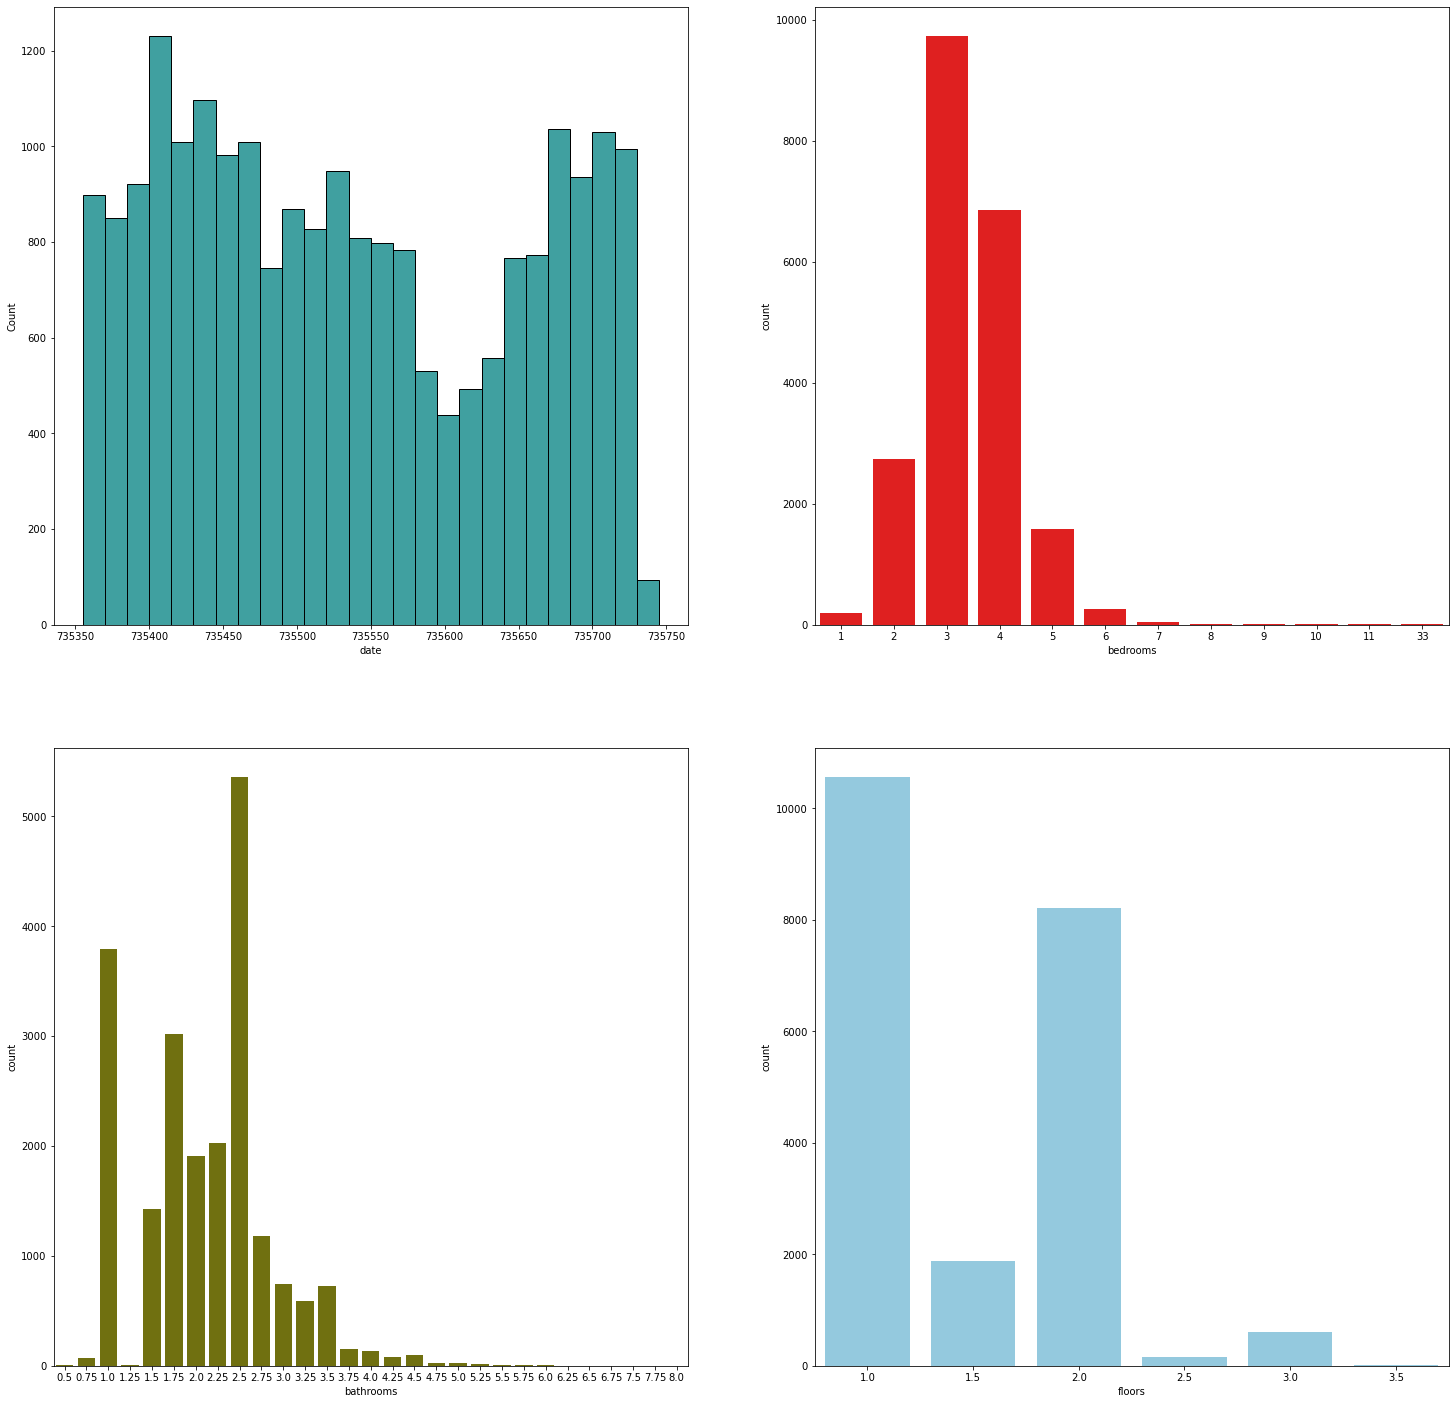

In [361]:
# take a look at distribution of variables

f, axes = plt.subplots(2, 2, figsize=(25, 25), sharex=False);
sns.histplot(x=df["date"] , color="teal", ax=axes[0, 0]);
sns.countplot(x=df["bedrooms"] , color="red", ax=axes[0, 1]);
sns.countplot(x=df["bathrooms"], color="olive", ax=axes[1, 0]);
sns.countplot(x=df["floors"] , color="skyblue", ax=axes[1, 1]);

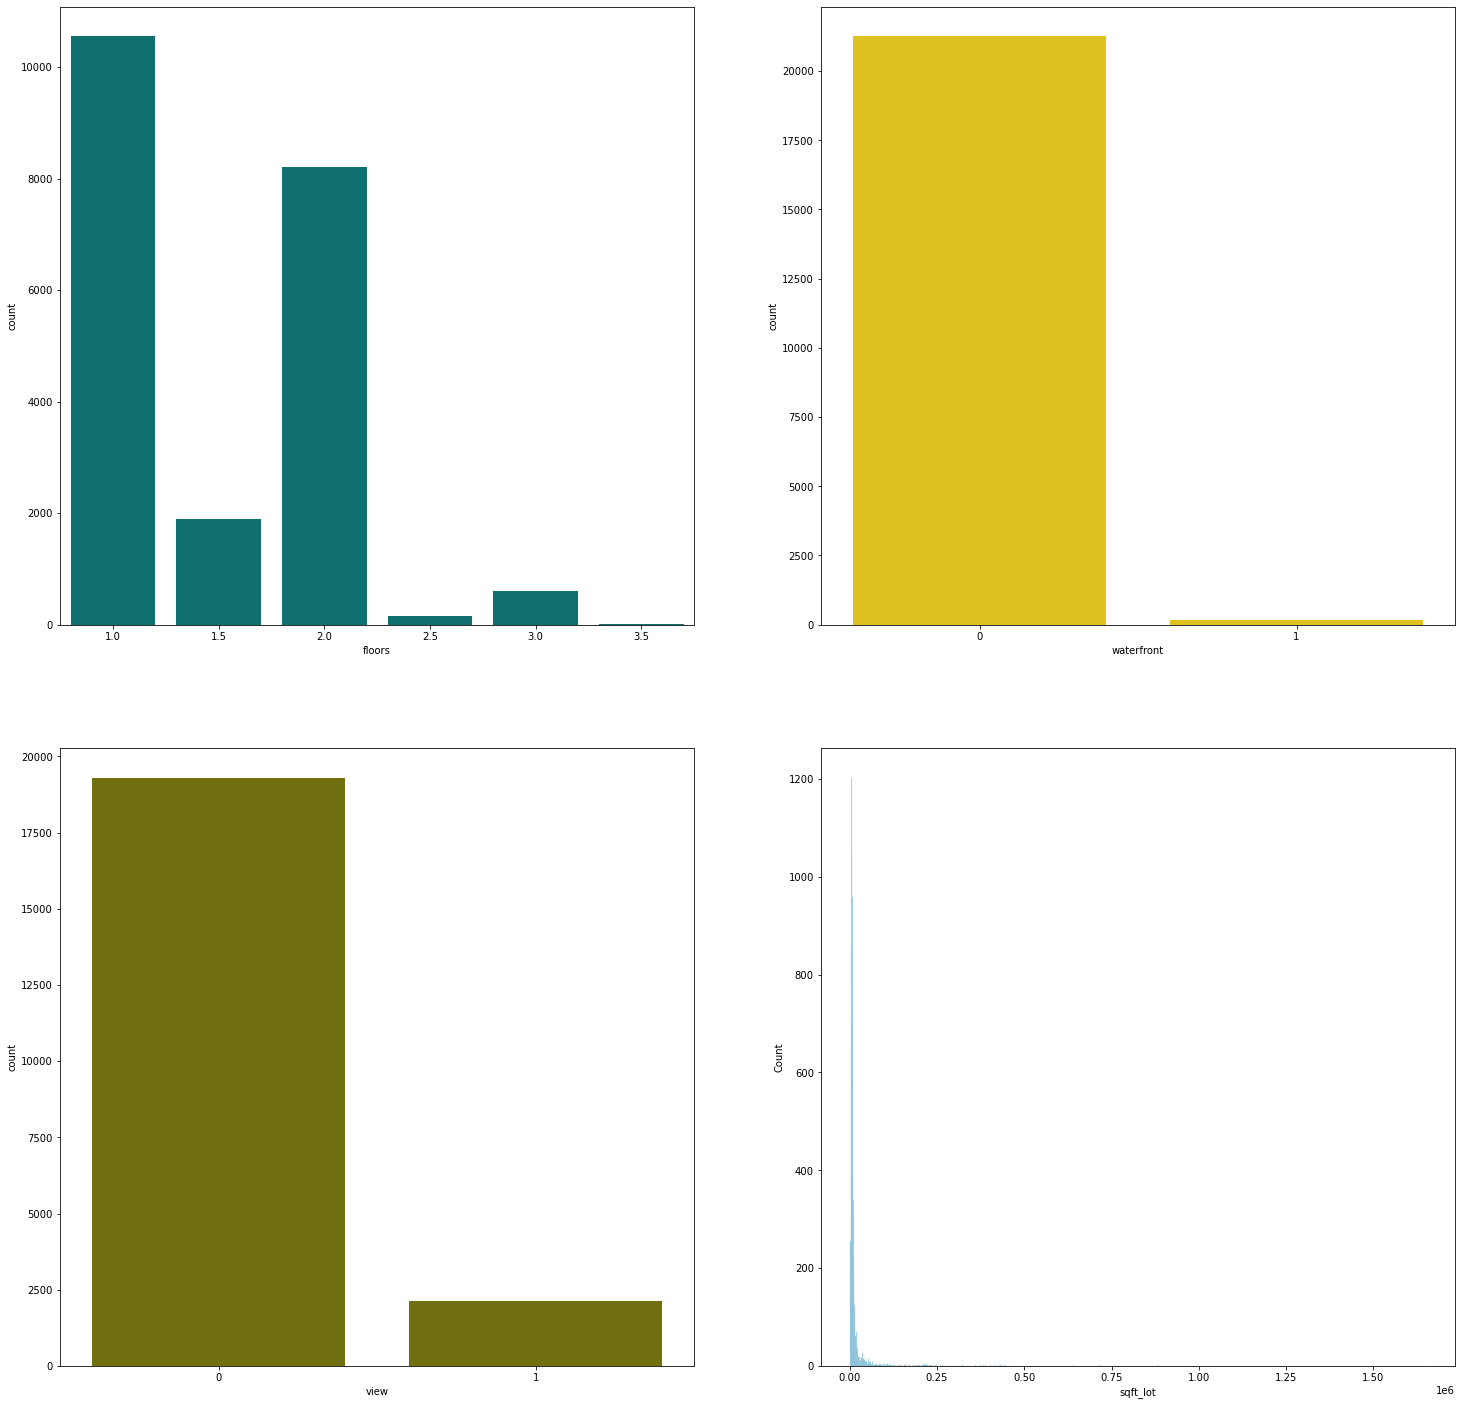

In [362]:
f, axes = plt.subplots(2, 2, figsize=(25, 25), sharex=False);
sns.countplot(x=df["floors"] , color="teal", ax=axes[0, 0]);
sns.countplot(x=df["waterfront"] , color="gold", ax=axes[0, 1]);
sns.countplot(x=df["view"], color="olive", ax=axes[1, 0]);
sns.histplot(x=df["sqft_lot"] , color="skyblue", ax=axes[1, 1]);

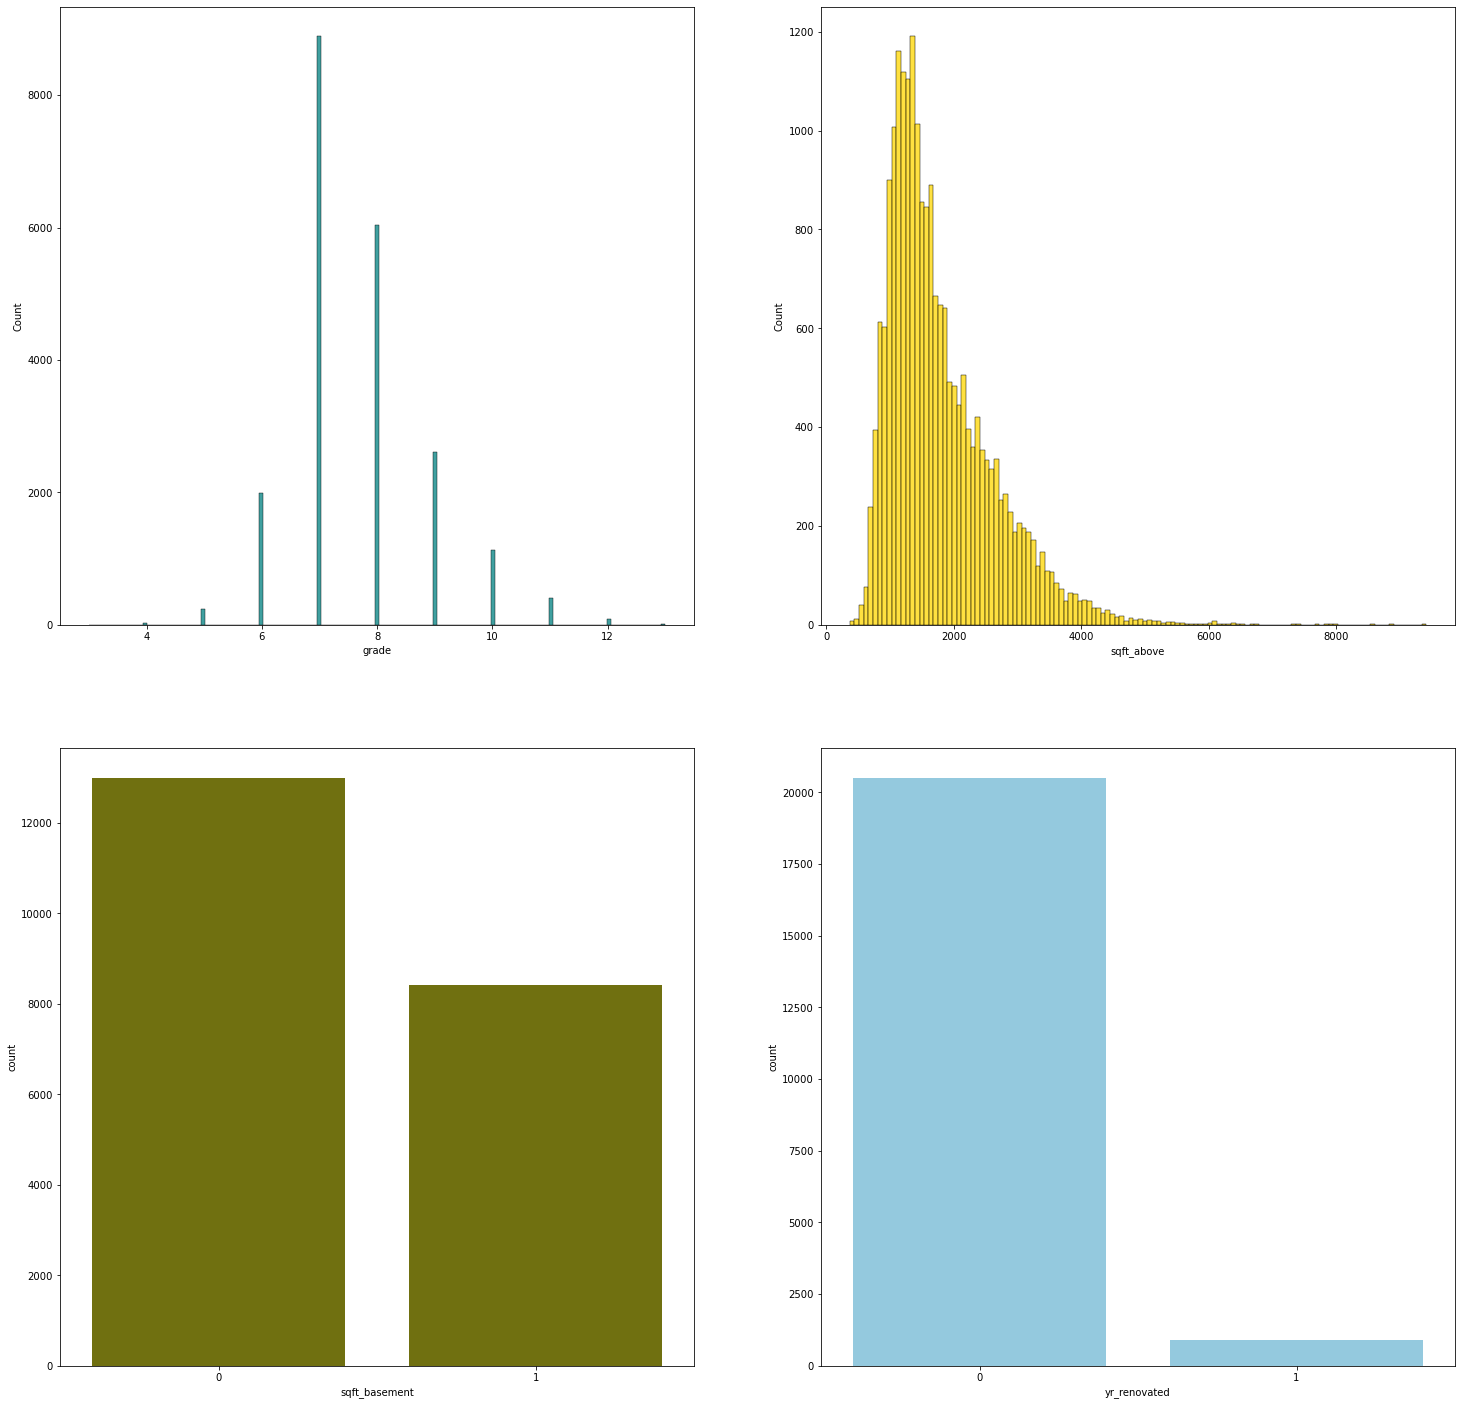

In [363]:
f, axes = plt.subplots(2, 2, figsize=(25, 25), sharex=False);
sns.histplot(x=df["grade"] , color="teal", ax=axes[0, 0]);
sns.histplot(x=df["sqft_above"] , color="gold", ax=axes[0, 1]);
sns.countplot(x=df["sqft_basement"], color="olive", ax=axes[1, 0]);
sns.countplot(x=df["yr_renovated"] , color="skyblue", ax=axes[1, 1]);

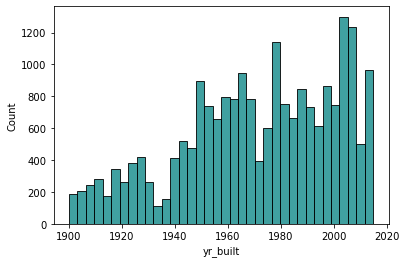

In [364]:
sns.histplot(x=df["yr_built"] , color="teal");

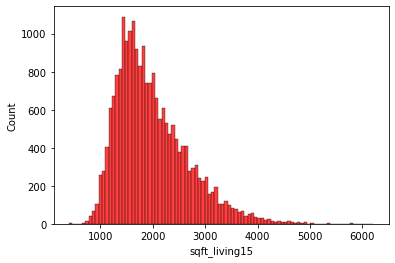

In [365]:
sns.histplot(x=df["sqft_living15"], color="red");

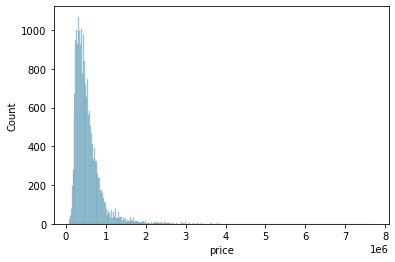

In [366]:
sns.histplot(x=df["price"] , color="skyblue");

### Observations
- yr_renovated provides no value because of the many zero values. 
- The same applies for view
- We assume that waterfront is driver of high prices, one of the business questions. I'll therefore keep it, but I'll also try a model without it
- The bedroom outlier observed in the eda needs to be removed manually
- sqft_living15, yr_built and sqft_above and sqft_lot are not in a uniform distribution and need transformation

In [367]:
# remove all values higher than 11 from the bedrooms column
df = df[df['bedrooms']<=11]

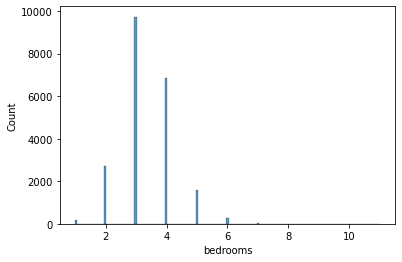

In [368]:
# see if removal worked
sns.histplot(x=df["bedrooms"]);

In [369]:
# drop columns
df=df.drop(['yr_renovated', 'view'], axis = 1) 

In [370]:
df.head(2)

,date,bedrooms,bathrooms,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,yr_built,sqft_living15,price
2495,735710,6,3.00,9373,2.0,0,7,2400,0,1991,2060,300000
6729,735361,4,1.75,26036,1.0,0,8,1160,1,1947,2590,647500


In [371]:
# Adding a log-transform column for sqft_living15, yr_built, sqft_above and sqft_lot 
# with the goal of achieving a more uniform distribution for those columns
df["sqft_living15_log"] = np.log(df["sqft_living15"])
df["yr_built_log"] = np.log(df["yr_built"])
df["sqft_above_log"] = np.log(df["sqft_above"])
df["sqft_lot_log"] = np.log(df["sqft_lot"])

In [372]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21419 entries, 2495 to 15937
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               21419 non-null  int64  
 1   bedrooms           21419 non-null  int64  
 2   bathrooms          21419 non-null  float64
 3   sqft_lot           21419 non-null  int64  
 4   floors             21419 non-null  float64
 5   waterfront         21419 non-null  int64  
 6   grade              21419 non-null  int64  
 7   sqft_above         21419 non-null  int64  
 8   sqft_basement      21419 non-null  int64  
 9   yr_built           21419 non-null  int64  
 10  sqft_living15      21419 non-null  int64  
 11  price              21419 non-null  int64  
 12  sqft_living15_log  21419 non-null  float64
 13  yr_built_log       21419 non-null  float64
 14  sqft_above_log     21419 non-null  float64
 15  sqft_lot_log       21419 non-null  float64
dtypes: float64(6), int6

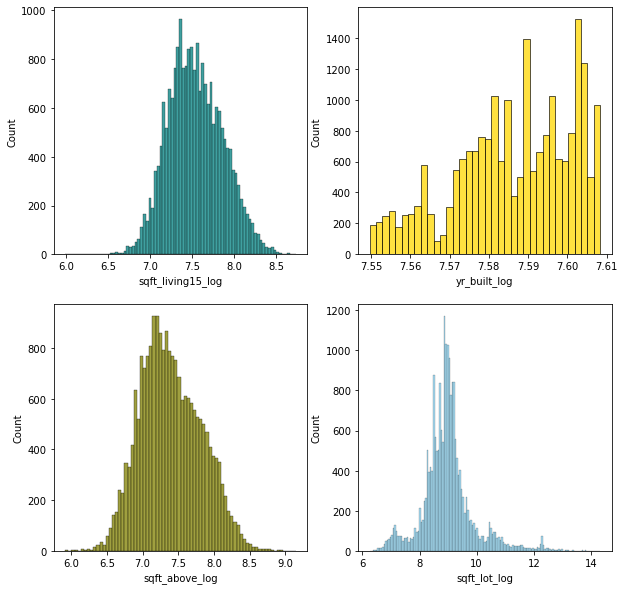

In [373]:
# check distribution of the log columns
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=False);
sns.histplot( df["sqft_living15_log"] , color="teal", ax=axes[0, 0]);
sns.histplot( df["yr_built_log"] , color="gold", ax=axes[0, 1]);
sns.histplot( df["sqft_above_log"] , color="olive", ax=axes[1, 0]);
sns.histplot( df["sqft_lot_log"] , color="skyblue", ax=axes[1, 1]);

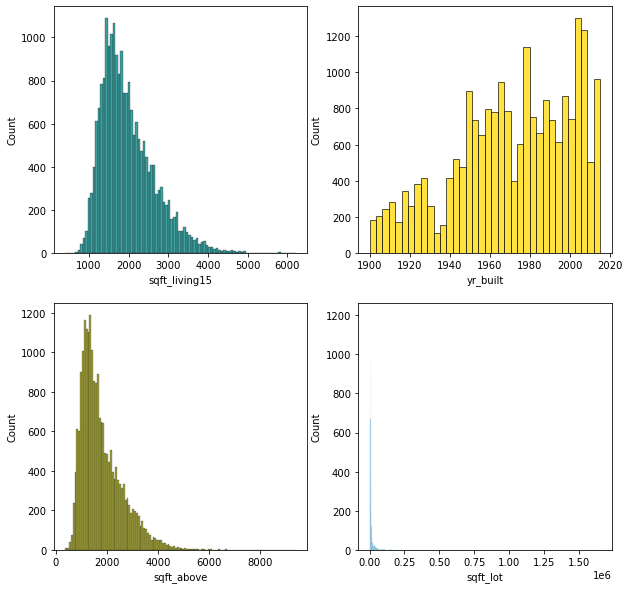

In [374]:
# compare with normal distribution
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=False);
sns.histplot( df["sqft_living15"] , color="teal", ax=axes[0, 0]);
sns.histplot( df["yr_built"] , color="gold", ax=axes[0, 1]);
sns.histplot( df["sqft_above"] , color="olive", ax=axes[1, 0]);
sns.histplot( df["sqft_lot"] , color="skyblue", ax=axes[1, 1]);

These four variables look a lot better after the log transform. We will drop the original columns, and create a new dataframe for that 

In [375]:
df_wrangled=df.drop(["sqft_living15","yr_built", "sqft_above", "sqft_lot"], axis=1)
df_wrangled.head()

,date,bedrooms,bathrooms,floors,waterfront,grade,sqft_basement,price,sqft_living15_log,yr_built_log,sqft_above_log,sqft_lot_log
2495,735710,6,3.00,2.0,0,7,0,300000,7.630461,7.596392,7.783224,9.145588
6729,735361,4,1.75,1.0,0,8,1,647500,7.859413,7.574045,7.056175,10.167235
8404,735456,3,1.00,1.0,0,7,0,400000,7.718685,7.576610,7.286192,10.668955
8800,735689,3,1.00,1.5,0,6,1,235000,7.162397,7.565275,6.917706,8.935772
3553,735676,4,2.00,1.0,0,7,1,402500,7.299797,7.576097,6.633318,8.161660


***

## Applying a linear regression model to the dataframe

In [376]:
'''Defining the variables:
Y as 'price' - the variable we want to predict,
and X as all other columns of our dataframe.'''

y = df_wrangled['price'] # define Y as price, the variable that will be predicted

X = df_wrangled.drop(['price'], axis=1) # define X as all other variables except price

### Split the data into training and testing sets
***
The next step will split our data into a train and a test sample so we can train the model and get a benchmark for its precision

In [377]:
'''We use sklearn train_test_split function to achieve this
the test_size is the percentage of the data we use to test our model with, 
meaning we feed it 70% of the available data. The random state generates a 
random number for the split to ensure consistency'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=40) 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14993, 11)
(6426, 11)
(14993,)
(6426,)


In [378]:
# Fitting the training data into the linear regression model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [379]:
# A predicition array is presented
predictions  = lin_model.predict(X_test)
predictions

array([397231.28166127, 973203.75129159, 495666.57881012, ...,
       320546.482468  , 321445.91379179, 701838.80669371])

In [380]:
#This is the r2 score
r2 = r2_score(y_test, predictions)
r2

0.6290357313894337

In [381]:
#This is the RMSE
mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
print(rmse)

212384.17573944372


### Below, you can see the regression model's predictions compared against the y_test values

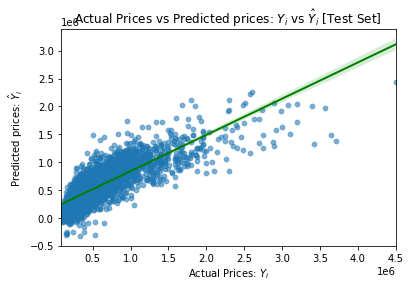

In [382]:
sns.scatterplot(y_test, predictions, alpha=0.4)
sns.regplot(y_test, predictions, truncate=True, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2})

plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ [Test Set]")
 
plt.show()

### This wrangled dataframe has performed better in linear regression than out orignal try
***

## Applying a Polynomial regression model to the dataframe
***
In this section, the model from the previous section is converted into a Polynomial model of order 2. After this, a regression model is run and predictions are obtained.

In [383]:
'''Defining the variables:
Y as 'price' - the variable we want to predict,
and X as all other columns of our dataframe.'''

y = df_wrangled['price'] # define Y as price, the variable that will be predicted

X = df_wrangled.drop(['price'], axis=1) # define X as all other variables except price

In [384]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=40) 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14993, 11)
(6426, 11)
(14993,)
(6426,)


In [385]:
def create_polynomial_regression_model(degree):
  
  poly_features = PolynomialFeatures(degree=degree)
  
  # With this line of code, the previous's section model is transformed into higher features
  X_train_poly = poly_features.fit_transform(X_train)
  
  # The transformed features are fitted to a polinomial regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, y_train)
  
  # A prediction on the training data set is conducted
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # A prediciton on the test data set is carried out
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # The training dataset is evaluated
  rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
  r2_train = r2_score(y_train, y_train_predicted)
  
  # Model'S evaluation on the test data set
  rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
  r2_test = r2_score(y_test, y_test_predict)
  
  print("The model's performance for the training set")
  print("-------------------------------------------")
  print("Training set's RMSE is {}".format(rmse_train))
  print("Training set's R_2 score is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("Testing set's RMSE is {}".format(rmse_test))
  print("Testing set's R_2 score is {}".format(r2_test))  
    
create_polynomial_regression_model(1)

The model's performance for the training set
-------------------------------------------
Training set's RMSE is 235637.41876020082
Training set's R_2 score is 0.6058742389487826


The model performance for the test set
-------------------------------------------
Testing set's RMSE is 212384.1757394495
Testing set's R_2 score is 0.6290357313894136


In [386]:
#These are the predicted values
degree=2
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_train_predicted = poly_model.predict(X_train_poly)
y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
y_test_predict 

array([ 356350.76531982, 1042083.98309326,  495020.175354  , ...,
        303111.88031006,  323220.07763672,  687623.99554443])

### Below, you can see the polynomial model's predictions compared against the y_test values

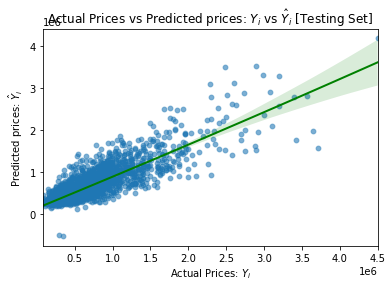

In [387]:
sns.scatterplot(y_test, y_test_predict, alpha=0.4)
sns.regplot(y_test, y_test_predict, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2}, order=2)
 
plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ [Testing Set]")
 
plt.show()

# Comparison linear <> polynomial regression

#### Linear regression

R2: 0.6290357313894257

RSME: 212384.17573944372


#### Polynomial regression

R2: 0.6290357313894136 (slightly worse than linear regression

RMSE: 212384.1757394495

## Can further wrangling improve the result?

In [388]:
# we start with our wrangled dataset and assign a new variable for our further steps
df_wrangled.head()


,date,bedrooms,bathrooms,floors,waterfront,grade,sqft_basement,price,sqft_living15_log,yr_built_log,sqft_above_log,sqft_lot_log
2495,735710,6,3.00,2.0,0,7,0,300000,7.630461,7.596392,7.783224,9.145588
6729,735361,4,1.75,1.0,0,8,1,647500,7.859413,7.574045,7.056175,10.167235
8404,735456,3,1.00,1.0,0,7,0,400000,7.718685,7.576610,7.286192,10.668955
8800,735689,3,1.00,1.5,0,6,1,235000,7.162397,7.565275,6.917706,8.935772
3553,735676,4,2.00,1.0,0,7,1,402500,7.299797,7.576097,6.633318,8.161660


In [389]:
# First try is simple linear regression without the date column since it could skew the model 

y = df_wrangled['price'] # define Y as price, the variable that will be predicted

X = df_wrangled.drop(['price', 'date'], axis=1) # define X as all other variables except date and price

In [390]:
#splitting the dara

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=40) 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14993, 10)
(6426, 10)
(14993,)
(6426,)


In [391]:
# Fitting the training data into the linear regression model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [392]:
#This is the result equation's intercept (the constant)
lin_model.intercept_

64201101.1345152

In [393]:
#These are estimated coefficients 
lin_model.coef_

array([  -24272.05536105,   101797.59221674,   -17602.05225116,
         788608.12761662,   161804.217303  ,    67187.02610971,
         101929.32299821, -8800910.95188454,   154085.70749348,
         -20143.88680802])

In [394]:
# A predicition array is presented
predictions  = lin_model.predict(X_test)
predictions

array([380848.4007494 , 951901.22535047, 479633.71503145, ...,
       325809.97708335, 342204.10881339, 705567.06215645])

In [395]:
#This is the r2 score
r2 = r2_score(y_test, predictions)
r2

0.6293756496701295

In [396]:
mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
print(rmse)

212286.84856347472


#### Comparing results

- best model scores:

R2: 0.6290357313894257

RSME: 212384.17573944372
    
- current model scores

R2: 0.6293756496701295 (slightly improved)
    
RSME: 212286.84856347472 (slightly improved)
***

In [397]:
# Another try with linear regression without the date & waterfront column since it could skew the model 
'''Defining the variables:
Y as 'price' - the variable we want to predict,
and X as all other columns except date of our dataframe.'''

y = df_wrangled['price'] # define Y as price, the variable that will be predicted

X = df_wrangled.drop(['price', 'date', 'waterfront'], axis=1) # define X as all other variables except date and price

In [398]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=40) 

# Fitting the training data into the linear regression model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [399]:
#This is the r2 score
r2 = r2_score(y_test, predictions)
r2

0.6293756496701295

In [400]:
# RSME of the model
mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
print(rmse)

212286.84856347472


### This model performt worse than using waterfront, so it stays in the dataframe

We will continue without the date column, but lets check if we can add some data back and improve the model

We will try to run a modell with scaled and preprocessed data from the original dataframe minus the date column. We will use standardscaler to achieve some scaling of the data

In [401]:
# recall the unwrangled copy
df_copy

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
2495,735710,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,2060,7316,300000
6729,735361,4,1.75,2060,26036,1.0,0,0,4,8,1160,1,1947,0,98166,2590,21891,647500
8404,735456,3,1.00,1460,43000,1.0,0,0,3,7,1460,0,1952,0,98166,2250,20023,400000
8800,735689,3,1.00,1430,7599,1.5,0,0,4,6,1010,1,1930,0,98168,1290,10320,235000
3553,735676,4,2.00,1650,3504,1.0,0,0,3,7,760,1,1951,1,98144,1480,3504,402500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16723,735439,5,2.00,1600,4168,1.5,0,0,3,7,1600,0,1927,0,98126,1190,4168,365000
3257,735668,2,1.00,1040,7372,1.0,0,0,5,7,840,1,1939,0,98126,1930,5150,380000
7614,735408,3,1.00,1100,4128,1.0,0,0,4,7,720,1,1942,0,98126,1510,4538,339000
20963,735417,2,1.75,1410,1005,1.5,0,0,3,9,900,1,2011,0,98027,1440,1188,399900


In [402]:
# create another copy
df_copy2=df_copy

In [403]:
# remove date
df_copy=df_copy.drop(['date'], axis = 1) 

In [404]:
# check if that worked
df_copy.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
2495,6,3.0,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,2060,7316,300000


In [405]:
# applying the standardscaler
transformer = StandardScaler().fit(df_copy.iloc[:,:-1]) # scale all data except last colum, price

x_standardized = transformer.transform(df_copy.iloc[:,:-1])

In [406]:
# assign column headers
full_standardized = pd.DataFrame(x_standardized,columns=df_copy.columns.tolist()) # assign names from former dataframe minus price
#check dataframe
full_standardized.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,2.837799,1.146831,0.344876,-0.138576,0.933243,-0.087567,-0.330907,-0.631956,-0.565549,0.734704,-0.804872,0.677421,-0.210639,-1.418843,0.104469,-0.199661
1,0.676531,-0.479287,-0.025177,0.262654,-0.918375,-0.087567,-0.330907,0.906458,0.287734,-0.761663,1.242433,-0.819867,-0.210639,1.647940,0.877604,0.333344
2,-0.404103,-1.454958,-0.678212,0.671131,-0.918375,-0.087567,-0.330907,-0.631956,-0.565549,-0.399639,-0.804872,-0.649721,-0.210639,1.647940,0.381631,0.265031
3,-0.404103,-1.454958,-0.710864,-0.181292,0.007434,-0.087567,-0.330907,0.906458,-1.418832,-0.942675,1.242433,-1.398365,-0.210639,1.685340,-1.018764,-0.089805
4,0.676531,-0.154064,-0.471418,-0.279896,-0.918375,-0.087567,-0.330907,-0.631956,-0.565549,-1.244362,1.242433,-0.683750,4.747469,1.236542,-0.741602,-0.339065


In [407]:
# fit the LR model
X = full_standardized
y = df_copy['price']

In [408]:
#splitting the dara
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=40) 

# Fitting the training data into the linear regression model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [409]:
r2 = r2_score(y_test, predictions)
r2

0.26421782049918396

### The linear regression model performt worse with this data. Lets try polynomial

In [410]:
# fit the polynomial regression model
def create_polynomial_regression_model(degree):
  
  poly_features = PolynomialFeatures(degree=degree)
  
  # With this line of code, the previous's section model is transformed into higher features
  X_train_poly = poly_features.fit_transform(X_train)
  
  # The transformed features are fitted to a polinomial regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, y_train)
  
  # A prediction on the training data set is conducted
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # A prediciton on the test data set is carried out
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # The training dataset is evaluated
  rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
  r2_train = r2_score(y_train, y_train_predicted)
  
  # Model'S evaluation on the test data set
  rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
  r2_test = r2_score(y_test, y_test_predict)
  
  print("The model's performance for the training set")
  print("-------------------------------------------")
  print("Training set's RMSE is {}".format(rmse_train))
  print("Training set's R_2 score is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("Testing set's RMSE is {}".format(rmse_test))
  print("Testing set's R_2 score is {}".format(r2_test))  
    
create_polynomial_regression_model(1)

The model's performance for the training set
-------------------------------------------
Training set's RMSE is 217714.01425207555
Training set's R_2 score is 0.6528813544501639


The model performance for the test set
-------------------------------------------
Testing set's RMSE is 214824.37136192547
Testing set's R_2 score is 0.6495489329602582


### The polynomial model performed even better with this new dataset

Old Highscore: 

R2: 0.6293756496701295

RSME: 212286.84856347472

New Highscores: 

R_2: 0.6495489329602582

RMSE: 214824.37136192547 (slightly worse)
***


We are under the impression that we need to handle the unbalanced columns we dropped earlier to achievy higher accuracy of the model. I might try another run later

# The Following was done after project deadline

# Creating a completely new model with a different approach
#### preserving as much data as possible

In [462]:
df=df3
df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,sqft_living15_log,yr_built_log,sqft_above_log,sqft_lot_log
2495,735710,6,3.00,2400,9373,2.0,0,0,3,7,...,1991,0,98002,2060,7316,300000,7.630461,7.596392,7.783224,9.145588
6729,735361,4,1.75,2060,26036,1.0,0,0,4,8,...,1947,0,98166,2590,21891,647500,7.859413,7.574045,7.056175,10.167235
8404,735456,3,1.00,1460,43000,1.0,0,0,3,7,...,1952,0,98166,2250,20023,400000,7.718685,7.576610,7.286192,10.668955
8800,735689,3,1.00,1430,7599,1.5,0,0,4,6,...,1930,0,98168,1290,10320,235000,7.162397,7.565275,6.917706,8.935772
3553,735676,4,2.00,1650,3504,1.0,0,0,3,7,...,1951,1,98144,1480,3504,402500,7.299797,7.576097,6.633318,8.161660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16723,735439,5,2.00,1600,4168,1.5,0,0,3,7,...,1927,0,98126,1190,4168,365000,7.081709,7.563720,7.377759,8.335192
3257,735668,2,1.00,1040,7372,1.0,0,0,5,7,...,1939,0,98126,1930,5150,380000,7.565275,7.569928,6.733402,8.905444
7614,735408,3,1.00,1100,4128,1.0,0,0,4,7,...,1942,0,98126,1510,4538,339000,7.319865,7.571474,6.579251,8.325548
20963,735417,2,1.75,1410,1005,1.5,0,0,3,9,...,2011,0,98027,1440,1188,399900,7.272398,7.606387,6.802395,6.912743


In [464]:
# drop columns of which we have newer data available
df=df.drop(['date'], axis = 1) 
df = df[df['bedrooms']<=11]
df3=df

In [465]:
# apply booloean function to yr_renovated colum. This means, I'll only tell the model wether or not a renovation happened. 
# This also helps with the distribution of the data
df['yr_renovated']=df['yr_renovated'].apply(boolean)

# do the same for sqft_basement, only acting as indicator on wether or not there is a basement
# due to the amount of zeros in the column
df['sqft_basement']=df['sqft_basement'].apply(boolean)

# do the same for view, only acting as indicator on wether or not there is a view
df['view']=df['view'].apply(boolean)


# check if that worked by looking at the head again
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,sqft_living15_log,yr_built_log,sqft_above_log,sqft_lot_log
2495,6,3.00,2400,9373,2.0,0,0,3,7,2400,...,1991,0,98002,2060,7316,300000,7.630461,7.596392,7.783224,9.145588
6729,4,1.75,2060,26036,1.0,0,0,4,8,1160,...,1947,0,98166,2590,21891,647500,7.859413,7.574045,7.056175,10.167235
8404,3,1.00,1460,43000,1.0,0,0,3,7,1460,...,1952,0,98166,2250,20023,400000,7.718685,7.576610,7.286192,10.668955
8800,3,1.00,1430,7599,1.5,0,0,4,6,1010,...,1930,0,98168,1290,10320,235000,7.162397,7.565275,6.917706,8.935772
3553,4,2.00,1650,3504,1.0,0,0,3,7,760,...,1951,1,98144,1480,3504,402500,7.299797,7.576097,6.633318,8.161660


In [466]:
# log transform columns as above
df["sqft_living15_log"] = np.log(df["sqft_living15"])
df["yr_built_log"] = np.log(df["yr_built"])
df["sqft_above_log"] = np.log(df["sqft_above"])
df["sqft_lot_log"] = np.log(df["sqft_lot"])
# drop original columns
df=df.drop(["sqft_living15","yr_built", "sqft_above", "sqft_lot"], axis=1)
#reset index on original df
df.reset_index(drop=True, inplace=True)

In [467]:
# check if that worked
df.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_basement,yr_renovated,zipcode,sqft_lot15,price,sqft_living15_log,yr_built_log,sqft_above_log,sqft_lot_log
0,6,3.00,2400,2.0,0,0,3,7,0,0,98002,7316,300000,7.630461,7.596392,7.783224,9.145588
1,4,1.75,2060,1.0,0,0,4,8,1,0,98166,21891,647500,7.859413,7.574045,7.056175,10.167235
2,3,1.00,1460,1.0,0,0,3,7,0,0,98166,20023,400000,7.718685,7.576610,7.286192,10.668955
3,3,1.00,1430,1.5,0,0,4,6,1,0,98168,10320,235000,7.162397,7.565275,6.917706,8.935772
4,4,2.00,1650,1.0,0,0,3,7,1,1,98144,3504,402500,7.299797,7.576097,6.633318,8.161660


In [468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21419 entries, 0 to 21418
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bedrooms           21419 non-null  int64  
 1   bathrooms          21419 non-null  float64
 2   sqft_living        21419 non-null  int64  
 3   floors             21419 non-null  float64
 4   waterfront         21419 non-null  int64  
 5   view               21419 non-null  int64  
 6   condition          21419 non-null  int64  
 7   grade              21419 non-null  int64  
 8   sqft_basement      21419 non-null  int64  
 9   yr_renovated       21419 non-null  int64  
 10  zipcode            21419 non-null  int64  
 11  sqft_lot15         21419 non-null  int64  
 12  price              21419 non-null  int64  
 13  sqft_living15_log  21419 non-null  float64
 14  yr_built_log       21419 non-null  float64
 15  sqft_above_log     21419 non-null  float64
 16  sqft_lot_log       214

In [469]:
# next look at unique values in zipcode
df.zipcode.unique()


array([98002, 98166, 98168, 98144, 98178, 98108, 98032, 98055, 98118,
       98122, 98115, 98007, 98034, 98052, 98042, 98040, 98136, 98126,
       98146, 98188, 98059, 98109, 98116, 98103, 98006, 98075, 98024,
       98155, 98003, 98023, 98117, 98177, 98019, 98028, 98092, 98022,
       98070, 98038, 98107, 98106, 98065, 98053, 98072, 98077, 98133,
       98001, 98056, 98045, 98033, 98011, 98014, 98199, 98008, 98031,
       98004, 98074, 98030, 98027, 98029, 98058, 98010, 98005, 98198,
       98148, 98112, 98125, 98105, 98102, 98119, 98039])

In [470]:
# I will transform zipcode and encode it as a categorical variable
from sklearn.preprocessing import LabelBinarizer


In [471]:
label_binarizer = LabelBinarizer() #choose method for encoding

In [472]:
# create numpy array with encoded zipcodes
zipdum = label_binarizer.fit_transform(df['zipcode'])
zipdum

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [473]:
# create new dataframe vom numpy array
result_df = pd.DataFrame(zipdum)
result_df.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [474]:
# create new dataframe that contains of encoded zipcode and original df
dfmerge=pd.merge(df, result_df, left_index=True, right_index=True)
dfmerge.columns

Index([         'bedrooms',         'bathrooms',       'sqft_living',
                  'floors',        'waterfront',              'view',
               'condition',             'grade',     'sqft_basement',
            'yr_renovated',           'zipcode',        'sqft_lot15',
                   'price', 'sqft_living15_log',      'yr_built_log',
          'sqft_above_log',      'sqft_lot_log',                   0,
                         1,                   2,                   3,
                         4,                   5,                   6,
                         7,                   8,                   9,
                        10,                  11,                  12,
                        13,                  14,                  15,
                        16,                  17,                  18,
                        19,                  20,                  21,
                        22,                  23,                  24,
                    

In [477]:
modeldata=dfmerge.drop(['zipcode','price'], axis = 1) 

In [478]:
modeldata.columns

Index([         'bedrooms',         'bathrooms',       'sqft_living',
                  'floors',        'waterfront',              'view',
               'condition',             'grade',     'sqft_basement',
            'yr_renovated',        'sqft_lot15', 'sqft_living15_log',
            'yr_built_log',    'sqft_above_log',      'sqft_lot_log',
                         0,                   1,                   2,
                         3,                   4,                   5,
                         6,                   7,                   8,
                         9,                  10,                  11,
                        12,                  13,                  14,
                        15,                  16,                  17,
                        18,                  19,                  20,
                        21,                  22,                  23,
                        24,                  25,                  26,
                    

In [479]:
#scaling all variables
# applying the standardscaler
transformer = StandardScaler().fit(modeldata) 

x_standardized = transformer.transform(modeldata)

In [488]:
# assign column headers
full_standardized = pd.DataFrame(x_standardized,columns=modeldata.columns.tolist()) # assign names from former dataframe minus price
#check dataframe
full_standardized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21419 entries, 0 to 21418
Data columns (total 85 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bedrooms           21419 non-null  float64
 1   bathrooms          21419 non-null  float64
 2   sqft_living        21419 non-null  float64
 3   floors             21419 non-null  float64
 4   waterfront         21419 non-null  float64
 5   view               21419 non-null  float64
 6   condition          21419 non-null  float64
 7   grade              21419 non-null  float64
 8   sqft_basement      21419 non-null  float64
 9   yr_renovated       21419 non-null  float64
 10  sqft_lot15         21419 non-null  float64
 11  sqft_living15_log  21419 non-null  float64
 12  yr_built_log       21419 non-null  float64
 13  sqft_above_log     21419 non-null  float64
 14  sqft_lot_log       21419 non-null  float64
 15  0                  21419 non-null  float64
 16  1                  214

In [483]:
full_standardized.columns

Index([         'bedrooms',         'bathrooms',       'sqft_living',
                  'floors',        'waterfront',              'view',
               'condition',             'grade',     'sqft_basement',
            'yr_renovated',        'sqft_lot15', 'sqft_living15_log',
            'yr_built_log',    'sqft_above_log',      'sqft_lot_log',
                         0,                   1,                   2,
                         3,                   4,                   5,
                         6,                   7,                   8,
                         9,                  10,                  11,
                        12,                  13,                  14,
                        15,                  16,                  17,
                        18,                  19,                  20,
                        21,                  22,                  23,
                        24,                  25,                  26,
                    

In [489]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21419 entries, 2495 to 15937
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bedrooms           21419 non-null  int64  
 1   bathrooms          21419 non-null  float64
 2   sqft_living        21419 non-null  int64  
 3   sqft_lot           21419 non-null  int64  
 4   floors             21419 non-null  float64
 5   waterfront         21419 non-null  int64  
 6   view               21419 non-null  int64  
 7   condition          21419 non-null  int64  
 8   grade              21419 non-null  int64  
 9   sqft_above         21419 non-null  int64  
 10  sqft_basement      21419 non-null  int64  
 11  yr_built           21419 non-null  int64  
 12  yr_renovated       21419 non-null  int64  
 13  zipcode            21419 non-null  int64  
 14  sqft_living15      21419 non-null  int64  
 15  sqft_lot15         21419 non-null  int64  
 16  price              

In [490]:
# fit the LR model
X = full_standardized
y = df3['price']

In [491]:
#splitting the dara
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=40) 

# Fitting the training data into the linear regression model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [492]:
r2 = r2_score(y_test, predictions)
r2

0.6293756496701295

In [493]:
mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
print(rmse)

212286.84856347472


In [495]:
# fit the polynomial regression model
def create_polynomial_regression_model(degree):
  
  poly_features = PolynomialFeatures(degree=degree)
  
  # With this line of code, the previous's section model is transformed into higher features
  X_train_poly = poly_features.fit_transform(X_train)
  
  # The transformed features are fitted to a polinomial regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, y_train)
  
  # A prediction on the training data set is conducted
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # A prediciton on the test data set is carried out
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # The training dataset is evaluated
  rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
  r2_train = r2_score(y_train, y_train_predicted)
  
  # Model'S evaluation on the test data set
  rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
  r2_test = r2_score(y_test, y_test_predict)
  
  print("The model's performance for the training set")
  print("-------------------------------------------")
  print("Training set's RMSE is {}".format(rmse_train))
  print("Training set's R_2 score is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("Testing set's RMSE is {}".format(rmse_test))
  print("Testing set's R_2 score is {}".format(r2_test))  
    
create_polynomial_regression_model(1)

The model's performance for the training set
-------------------------------------------
Training set's RMSE is 165154.87517469245
Training set's R_2 score is 0.8063894114722482


The model performance for the test set
-------------------------------------------
Testing set's RMSE is 150654.14336279428
Testing set's R_2 score is 0.8133405721432074
